In [1]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import sklearn
import streamlit as st

In [3]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [4]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
matches.shape

(756, 18)

In [7]:
deliveries.shape

(179078, 21)

In [8]:
deliveries.groupby(['match_id', 'inning']).sum()['total_runs']

match_id  inning
1         1         207
          2         172
2         1         184
          2         187
3         1         183
                   ... 
11413     2         170
11414     1         155
          2         162
11415     1         152
          2         157
Name: total_runs, Length: 1528, dtype: int64

In [9]:
total_score = deliveries.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

In [10]:
total_score

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [11]:
total_score = total_score[total_score['inning'] == 1]

In [12]:
total_score

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [13]:
match_df = matches.merge(total_score[['match_id', 'total_runs']], left_on='id', right_on='match_id')

In [14]:
# match_df

In [15]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [16]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [17]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

In [18]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [19]:
match_df['dl_applied'].value_counts()

,count
dl_applied,
0,556
1,15


In [20]:
match_df = match_df[match_df['dl_applied'] == 0]

In [21]:
match_df.shape

(556, 20)

In [22]:
match_df = match_df[['match_id', 'city', 'winner', 'total_runs']]

In [23]:
match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
4,5,Bangalore,Royal Challengers Bangalore,157
6,7,Mumbai,Mumbai Indians,178
7,8,Indore,Kings XI Punjab,148
9,10,Mumbai,Mumbai Indians,158
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,143
752,11412,Chennai,Mumbai Indians,136
753,11413,Visakhapatnam,Delhi Capitals,171
754,11414,Visakhapatnam,Chennai Super Kings,155


In [24]:
match_df.merge(deliveries, on='match_id')

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132699,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
132700,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
132701,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
132702,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [25]:
deliveries_df = match_df.merge(deliveries, on='match_id')

In [26]:
deliveries_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132699,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
132700,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
132701,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
132702,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [27]:
deliveries_df = deliveries_df[deliveries_df['inning'] == 2]

In [28]:
deliveries_df.shape

(64192, 24)

In [29]:
deliveries_df.groupby('match_id')['total_runs_y'].cumsum()

,total_runs_y
125,1
126,1
127,1
128,3
129,7
...,...
132699,152
132700,154
132701,155
132702,157


In [30]:
deliveries_df = deliveries_df.copy()
deliveries_df['current_runs'] = deliveries_df.groupby('match_id')['total_runs_y'].cumsum()

In [31]:
# deliveries_df

In [32]:
deliveries_df = deliveries_df.copy()
deliveries_df['runs_left'] = deliveries_df['total_runs_x'] - deliveries_df['current_runs']
# deliveries_df

In [33]:
deliveries_df = deliveries_df.copy()
deliveries_df['balls_left'] = 126 - (deliveries_df['over']*6 + deliveries_df['ball'])
# deliveries_df

In [34]:
deliveries_df = deliveries_df.copy()
# deliveries_df['player_dismissed'] = deliveries_df['player_dismissed'].fillna("0")
# deliveries_df['player_dismissed'] = deliveries_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
# deliveries_df['player_dismissed'] = deliveries_df['player_dismissed'].astype('int')
# wickets = deliveries_df.groupby('match_id').cumsum()['player_dismissed'].values
# deliveries_df['wickets'] = 10 - wickets

# Convert NaN → 0, then any non-zero → 1
deliveries_df['player_dismissed'] = deliveries_df['player_dismissed'].fillna("0")
deliveries_df['player_dismissed'] = deliveries_df['player_dismissed'].ne("0").astype(int)

# Remaining wickets = 10 - cumulative wickets fallen (clipped at 0)
deliveries_df['wickets_left'] = (
    10 - deliveries_df.groupby('match_id')['player_dismissed'].cumsum()
).clip(lower=0)

In [35]:
deliveries_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_runs,runs_left,balls_left,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132699,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,0,4,5
132700,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-2,3,5
132701,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-3,2,4
132702,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-5,1,4


In [36]:
deliveries_df = deliveries_df.copy()
deliveries_df['current_run_rate'] = (deliveries_df['current_runs']*6)/(120 - deliveries_df['balls_left'])
deliveries_df['required_run_rate'] = (deliveries_df['runs_left']*6)/deliveries_df['balls_left']
# deliveries_df

In [37]:
deliveries_df = deliveries_df.copy()
def result(row):
  return 1 if row['batting_team'] == row['winner'] else 0

deliveries_df['result'] = (deliveries_df['batting_team'] == deliveries_df['winner']).astype(int)

In [38]:
final_df = deliveries_df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'total_runs_x', 'current_run_rate', 'required_run_rate', 'result']]
# final_df

In [39]:
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,current_run_rate,required_run_rate,result
10145,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,116,5,2,233,6.104348,139.2,0


In [40]:
final_df.dropna(inplace=True)
final_df = final_df[final_df['balls_left'] != 0]

In [41]:
from sklearn.model_selection import train_test_split
x = final_df.iloc[:, :-1]
y = final_df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [42]:
x_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,current_run_rate,required_run_rate
32333,Royal Challengers Bangalore,Kings XI Punjab,Chandigarh,58,39,7,163,7.777778,8.923077
15661,Rajasthan Royals,Royal Challengers Bangalore,Pune,149,95,9,180,7.440000,9.410526
41802,Chennai Super Kings,Mumbai Indians,Mumbai,145,112,10,157,9.000000,7.767857
54283,Chennai Super Kings,Kings XI Punjab,Mumbai,95,98,9,112,4.636364,5.816327
31678,Mumbai Indians,Delhi Daredevils,Mumbai,94,64,6,152,6.214286,8.812500
...,...,...,...,...,...,...,...,...,...
33074,Kings XI Punjab,Chennai Super Kings,Abu Dhabi,94,50,7,205,9.514286,11.280000
5276,Kolkata Knight Riders,Kings XI Punjab,Kolkata,165,116,10,170,7.500000,8.534483
12374,Rajasthan Royals,Royal Challengers Bangalore,Jaipur,114,56,9,189,7.031250,12.214286
33570,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata,2,10,7,135,7.254545,1.200000


In [43]:
print("Your DataFrame columns:", list(x_train.columns))

Your DataFrame columns: ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'total_runs_x', 'current_run_rate', 'required_run_rate']


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

categorical_features = ['batting_team', 'bowling_team', 'city']
numerical_features = ['runs_left', 'balls_left', 'wickets_left', 'total_runs_x', 'current_run_rate', 'required_run_rate']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

# Create and fit pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state = 42, max_iter = 1000))
])

# trf = ColumnTransformer([
#     ('trf', OneHotEncoder(drop='first'), ['batting_team', 'bowling_team', 'city'])
# ], remainder='passthrough')

# # Create pipeline
# pipe = Pipeline(steps=[
#     ('step1', trf),
#     ('step2', LogisticRegression(solver='liblinear'))
# ])

# Train the model
pipe.fit(x_train, y_train)

# Make predictions
y_pred = pipe.predict(x_test)

In [45]:
# Evaluate results
print(f"Accuracyn Score: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

# Get prediction probabilities (useful for confidence scores)
y_pred_prob = pipe.predict_proba(x_test)
print(f"Prediction Probability: {y_pred_prob}")

Accuracyn Score: 0.80943709920038
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      5828
           1       0.82      0.83      0.82      6803

    accuracy                           0.81     12631
   macro avg       0.81      0.81      0.81     12631
weighted avg       0.81      0.81      0.81     12631

Prediction Probability: [[0.31827538 0.68172462]
 [0.67490306 0.32509694]
 [0.26020542 0.73979458]
 ...
 [0.98661355 0.01338645]
 [0.8452671  0.1547329 ]
 [0.35865599 0.64134401]]


In [46]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [49]:
def match_progression(x_df, match_id, pipe):
    # Filter only one match and end of overs (ball=6)
    match = (
        x_df.loc[x_df['match_id'] == match_id]
        .query("ball == 6")
        .copy()
    )

    # Select relevant columns
    temp_df = (
        match[['batting_team','bowling_team','city','runs_left',
               'balls_left','wickets_left','total_runs_x','current_run_rate','required_run_rate']]
        .dropna()
        .query("balls_left != 0")
        .copy()
    )

    # Predict probabilities
    result = pipe.predict_proba(temp_df)
    temp_df = temp_df.assign(
        lose=np.round(result[:, 0] * 100, 1),
        win=np.round(result[:, 1] * 100, 1),
        end_of_over=np.arange(1, len(temp_df) + 1)
    )

    # Target runs
    target = temp_df['total_runs_x'].iloc[0]

    # Runs progression
    runs_left = temp_df['runs_left'].to_numpy()
    runs_shifted = np.insert(runs_left, 0, target)[:-1]
    temp_df['runs_after_over'] = runs_shifted - runs_left

    # Wickets progression
    wickets_left = temp_df['wickets_left'].to_numpy()
    wickets_shifted = np.insert(wickets_left, 0, 10)
    temp_df['wickets_in_over'] = wickets_shifted[:-1] - wickets_left

    # Final cleaned dataframe
    print(f"Target = {target}")
    return temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']], target


# Example usage
temp_df, target = match_progression(deliveries_df, 74, pipe)
temp_df

Target = 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
9564,1,4,0,62.5,37.5
9572,2,8,0,57.5,42.5
9578,3,1,0,64.0,36.0
9584,4,7,1,74.7,25.3
9590,5,12,0,65.6,34.4
9596,6,13,0,53.9,46.1
9602,7,9,0,48.1,51.9
9610,8,15,0,33.5,66.5
9616,9,7,0,31.2,68.8
9623,10,17,0,17.9,82.1


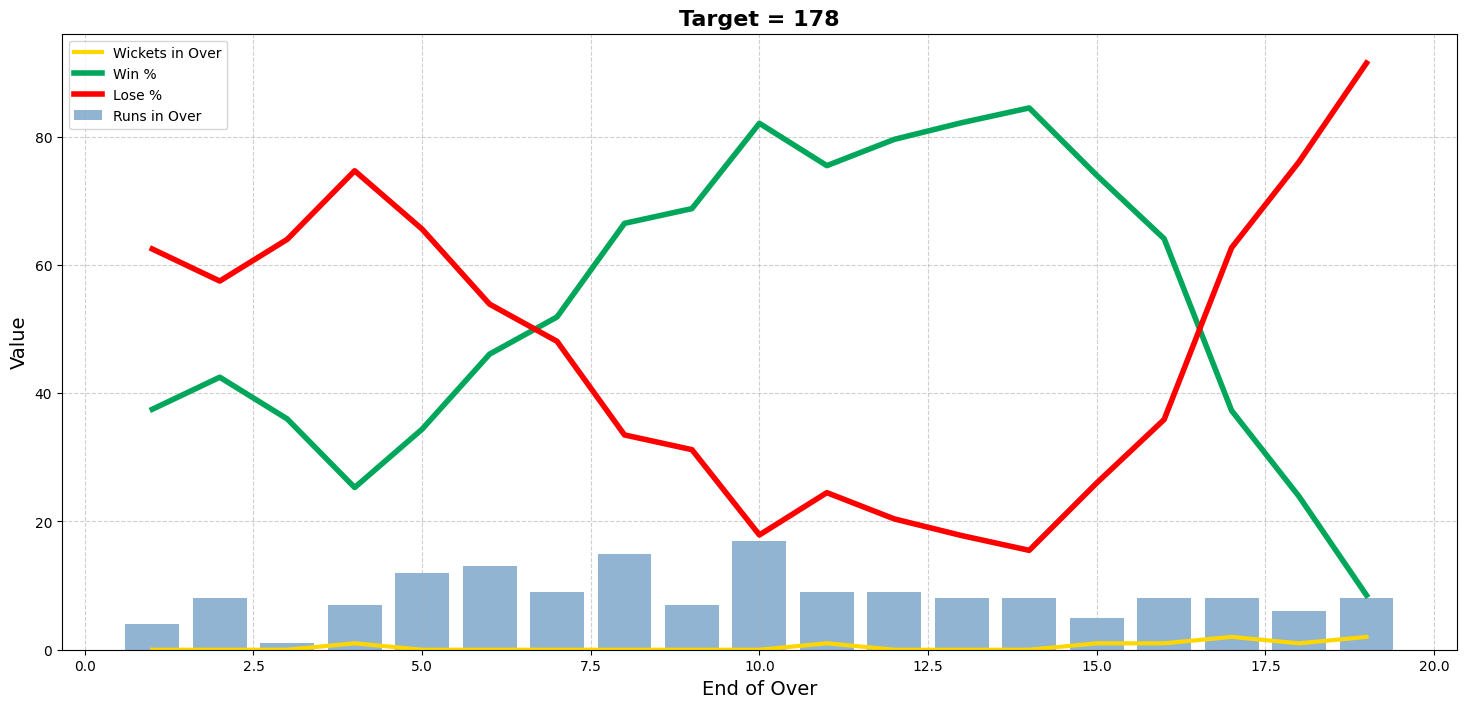

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 8))

# Line plots
ax.plot(
    temp_df['end_of_over'], temp_df['wickets_in_over'],
    color="gold", linewidth=3, label="Wickets in Over"
)
ax.plot(
    temp_df['end_of_over'], temp_df['win'],
    color="#00a65a", linewidth=4, label="Win %"
)
ax.plot(
    temp_df['end_of_over'], temp_df['lose'],
    color="red", linewidth=4, label="Lose %"
)

# Bar plot
ax.bar(
    temp_df['end_of_over'], temp_df['runs_after_over'],
    color="steelblue", alpha=0.6, label="Runs in Over"
)

# Title & labels
ax.set_title(f"Target = {target}", fontsize=16, fontweight="bold")
ax.set_xlabel("End of Over", fontsize=14)
ax.set_ylabel("Value", fontsize=14)

# Grid & legend
ax.grid(True, linestyle="--", alpha=0.6)
ax.legend()

plt.show()


In [51]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [52]:
deliveries_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Dharamsala', 'Pune', 'Raipur',
       'Ranchi', 'Abu Dhabi', 'Sharjah', nan, 'Cuttack', 'Visakhapatnam',
       'Mohali', 'Bengaluru'], dtype=object)

In [53]:
import joblib

# Save model
joblib.dump(pipe, "pipe.pkl")

# Load model
pipe_loaded = joblib.load("pipe.pkl")